#

1.1 Загрузить данные из файла как Pandas DataFrame

1.2 Вызвав  у датафрейма метод head, проверить корректность загруженных данных



In [ ]:
import pandas as pd

iris_data = pd.read_csv('sample_data/iris.csv')
iris_data.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [ ]:
import numpy as np
from scipy.stats import shapiro

seed(10)

arr_1 = np.random.randn(100)

seed(100000)

arr_2 = np.random.randn(100)

result = np.column_stack((arr_1, arr_2))

shapiro(result)

ShapiroResult(statistic=0.9921200275421143, pvalue=0.3548741340637207)

In [ ]:
del iris_data[iris_data.columns[0]]
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_data['target'].replace([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], inplace=True)
iris_data.to_csv('sample_data/iris_modify.csv', index=False)
iris_data.iloc[[0, 50, 100]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

def pair_grid(dataset, target):
    g = sns.PairGrid(dataset, diag_sharey=False, hue=target, palette='tab10')
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot)
    color_labels = []
    for curr_color in g.palette:
        color_labels.append(plt.Circle((0, 0), 1, color=curr_color))
    g.add_legend({g.hue_names[i]: color_labels[i] for i in range(len(g.palette))})
    g.fig.suptitle("Scatter plots and KDE's", y=1.02)


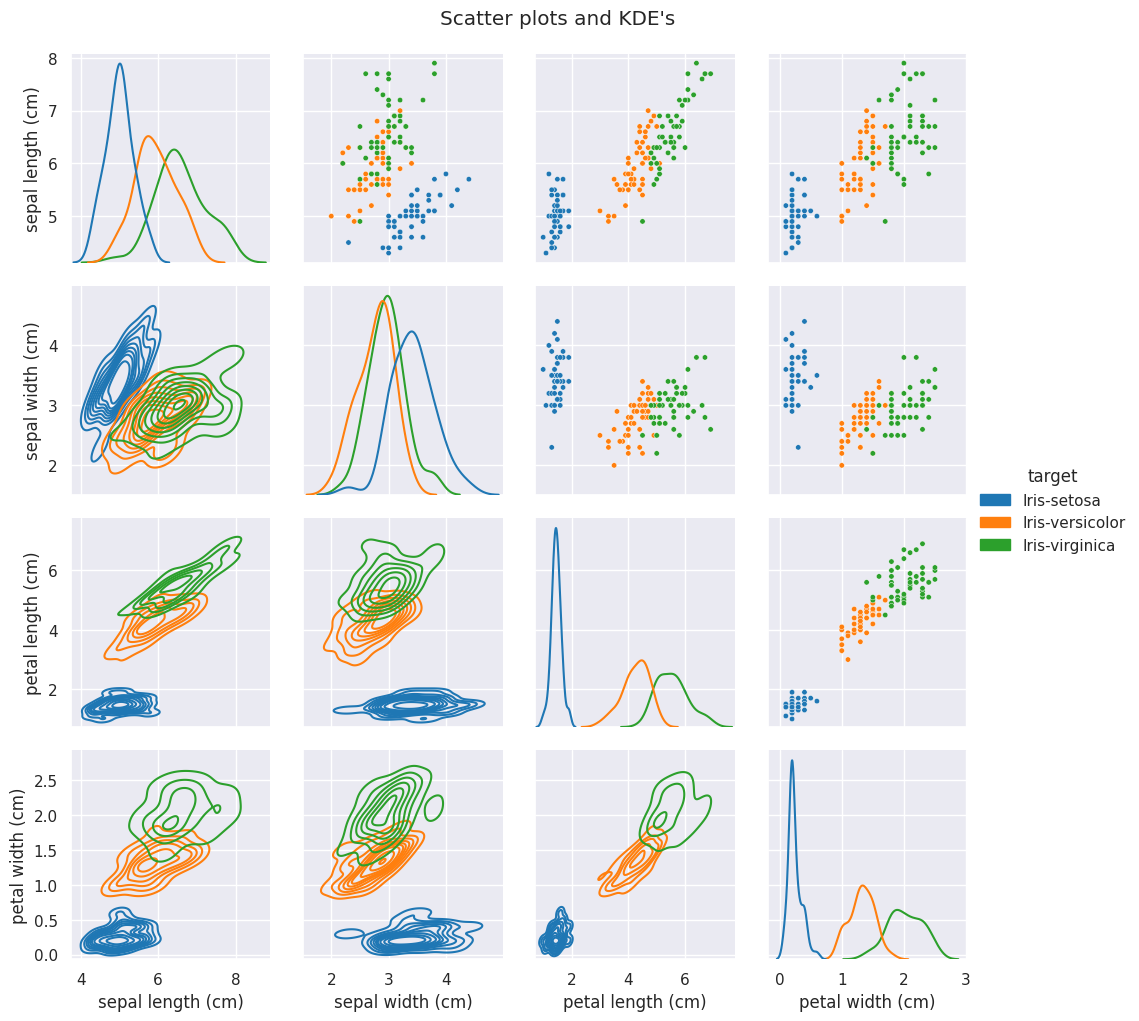

In [ ]:
pair_grid(dataset=iris_data, target='target')

In [ ]:
def histograms_plot(dataset, n_cols, n_bins=15, hue_val=None,
                    kde_val=False, multiple_mode='layer', element_val='bars',
                    title_name=''):

    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols**2, n_cols))
    palette_val = None
    if hue_val is not None:
        palette_val = 'tab10'
    for i in range(n_cols):
        sns.histplot(data=dataset, x=dataset.columns[i],
                     hue=hue_val, kde=kde_val, ax=axes[i],
                     palette=palette_val, bins=n_bins,
                     multiple=multiple_mode, element=element_val)
    fig.suptitle(title_name, y=1.02)
    plt.tight_layout(pad=0.5)
    plt.show()

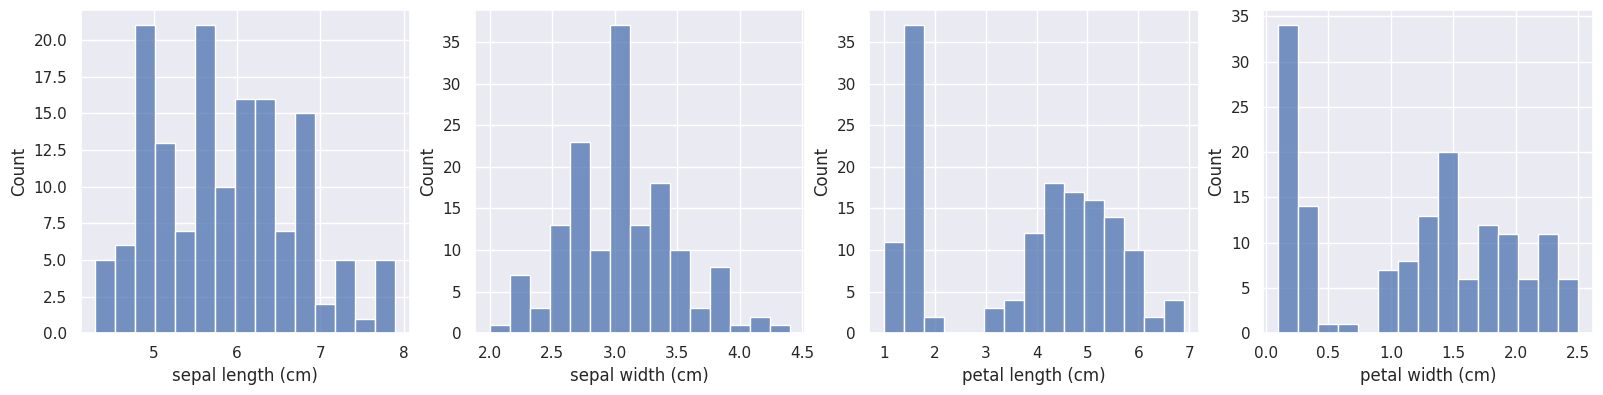

In [ ]:
histograms_plot(dataset=iris_data, n_cols=len(iris_data.columns)-1)

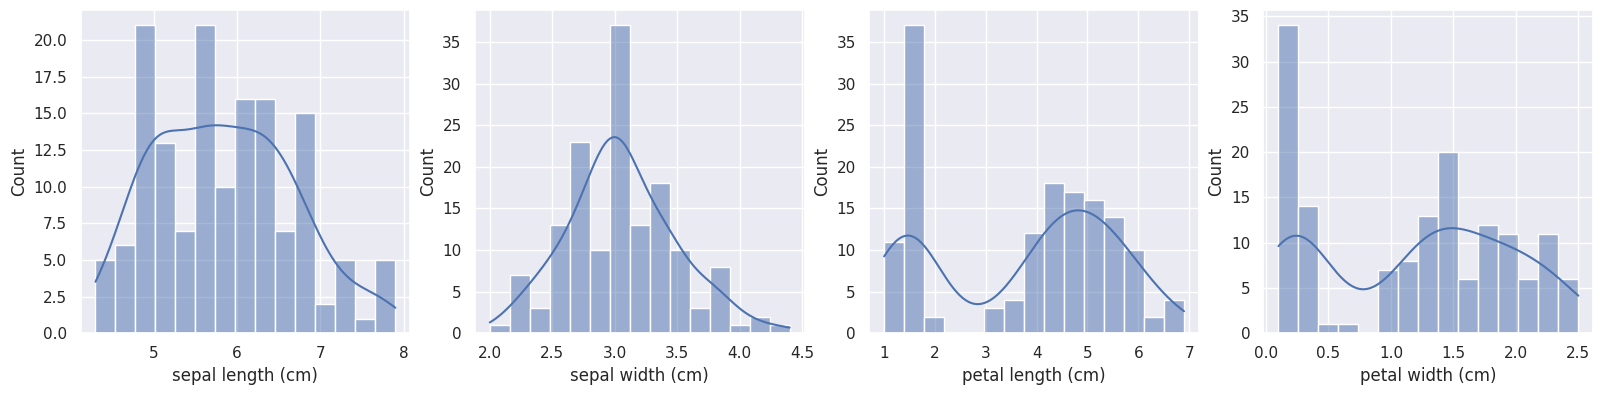

In [ ]:
histograms_plot(dataset=iris_data, n_bins=15, n_cols=len(iris_data.columns)-1, kde_val=True)

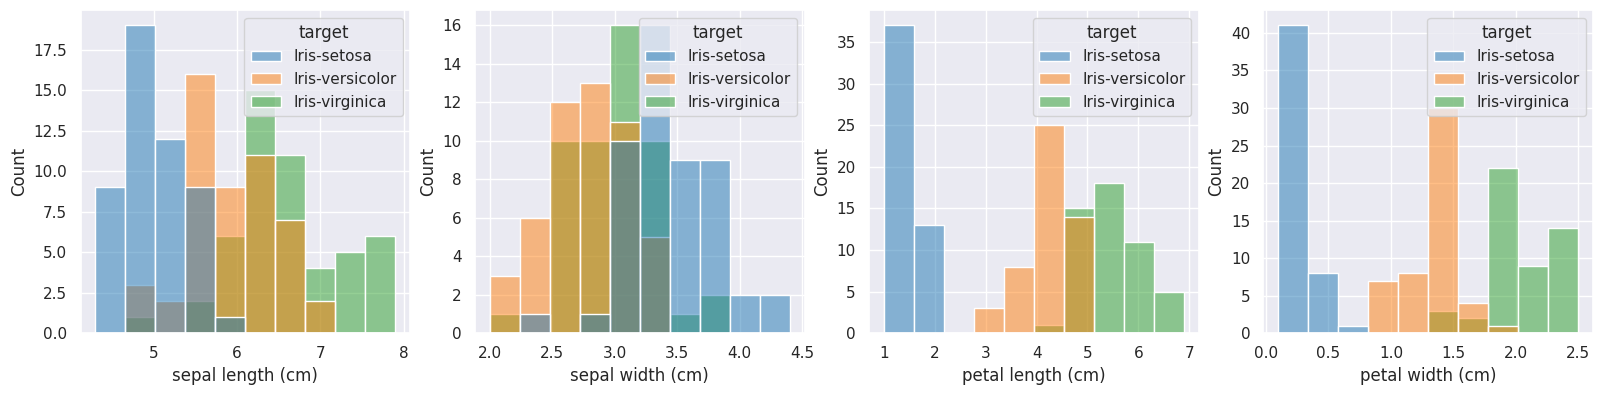

In [ ]:
histograms_plot(dataset=iris_data, n_bins=10, hue_val='target', n_cols=len(iris_data.columns)-1)

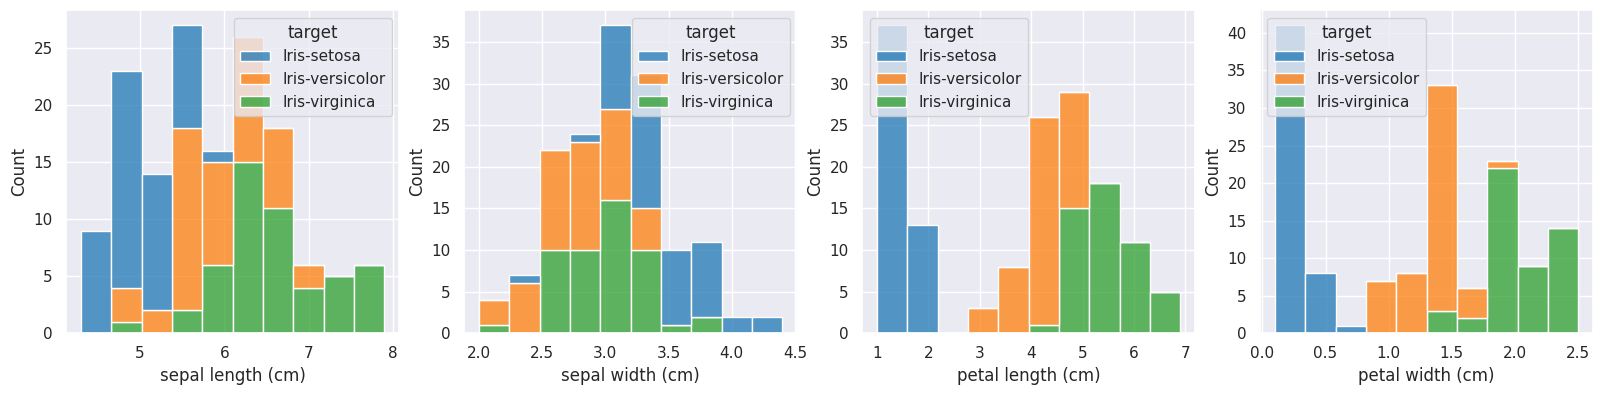

In [ ]:
histograms_plot(dataset=iris_data, n_bins=10, hue_val='target',
                multiple_mode='stack', n_cols=len(iris_data.columns)-1)

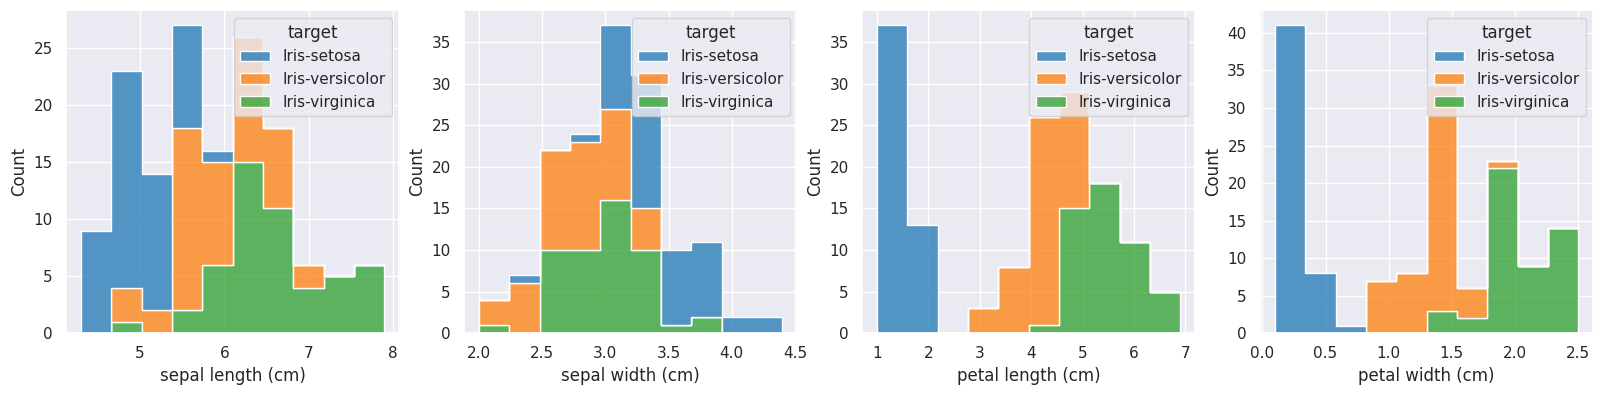

In [ ]:
histograms_plot(dataset=iris_data, n_bins=10, hue_val='target',
                multiple_mode='stack', element_val='step',
                n_cols=len(iris_data.columns)-1)

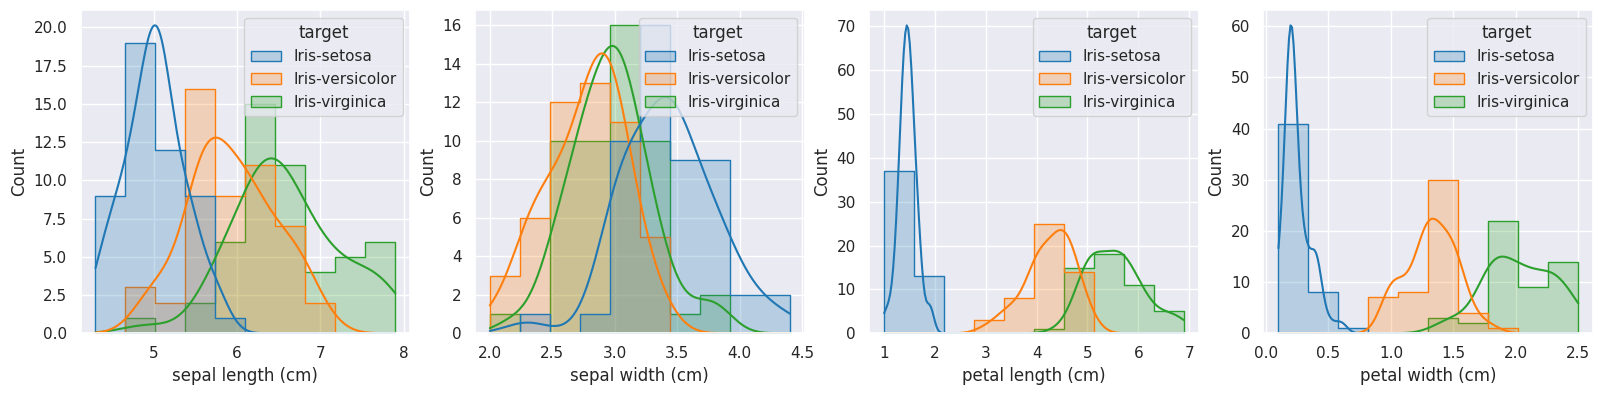

In [ ]:
histograms_plot(dataset=iris_data, n_bins=10,
                hue_val='target', kde_val=True,
                element_val='step',
                n_cols=len(iris_data.columns)-1)

In [ ]:
import numpy as np
iris_data['target'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    [0, 1, 2], inplace=True)
iris_data_np = iris_data.to_numpy()
iris_data_np[:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

In [ ]:
description = {'count': np.array([len(iris_data_np[:,i] != np.nan) for i in range(5)]),
                'mean': np.mean(iris_data_np, axis=0),
                'std': np.std(iris_data_np, ddof=1, axis=0),
                'min': np.min(iris_data_np, axis=0),
                '25%': np.quantile(iris_data_np, q=0.25, axis=0),
                '50%': np.quantile(iris_data_np, q=0.5, axis=0),
                '75%': np.quantile(iris_data_np, q=0.75, axis=0),
                'max': np.max(iris_data_np, axis=0)}
description_pd = pd.DataFrame(description, index=['sepal length (cm)',
                              'sepal width (cm)', 'petal length (cm)',
                                'petal width (cm)', 'target']).T
description_pd == iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,True,True,True,True,True
mean,True,True,True,True,True
std,True,True,True,True,True
min,True,True,True,True,True
25%,True,True,True,True,True
50%,True,True,True,True,True
75%,True,True,True,True,True
max,True,True,True,True,True


In [ ]:
description_pd[2:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
std,0.828066,0.435866,1.765298,0.762238,0.819232


In [ ]:
iris_data.describe()[2:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
std,0.828066,0.435866,1.765298,0.762238,0.819232


In [ ]:
var2_data = pd.read_csv('sample_data/lab1_var2.csv')
var2_data.head()

,Unnamed: 0,A,B,C,D,E,label
0,0,3.820369,0.944005,-2.515361,2.691548,4.587330,1
1,1,2.317692,-4.031270,1.096187,-4.324973,4.395063,1
2,2,3.031215,2.313363,-3.358096,2.744431,3.922414,0
3,3,2.880855,-2.467154,2.550000,-2.215556,0.858642,1
4,4,3.674317,-5.525880,5.199131,1.230003,2.516113,1


In [ ]:
del var2_data[var2_data.columns[0]]
var2_data.head()

,A,B,C,D,E,label
0,3.820369,0.944005,-2.515361,2.691548,4.587330,1
1,2.317692,-4.031270,1.096187,-4.324973,4.395063,1
2,3.031215,2.313363,-3.358096,2.744431,3.922414,0
3,2.880855,-2.467154,2.550000,-2.215556,0.858642,1
4,3.674317,-5.525880,5.199131,1.230003,2.516113,1


In [ ]:
var2_data.describe()

,A,B,C,D,E,label
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.059112,-0.050611,0.043850,-0.089783,3.123704,0.565000
std,1.167444,3.336619,3.126977,3.241638,1.337344,0.497001
min,0.153019,-6.179742,-5.131545,-7.268231,-0.458386,0.000000
25%,2.337088,-2.951520,-3.030783,-3.032036,2.279943,0.000000
50%,3.037541,0.129381,0.374458,1.189169,3.103441,1.000000
75%,3.804794,2.896585,2.984745,2.992634,3.977151,1.000000
max,6.560331,6.426588,5.199131,4.403511,7.304125,1.000000


In [ ]:
var2_data['label'].replace([0, 1],
 ['Iris-setosa', 'Iris-versicolor'], inplace=True)
var2_data.head(3)

,A,B,C,D,E,label
0,3.820369,0.944005,-2.515361,2.691548,4.587330,Iris-versicolor
1,2.317692,-4.031270,1.096187,-4.324973,4.395063,Iris-versicolor
2,3.031215,2.313363,-3.358096,2.744431,3.922414,Iris-setosa


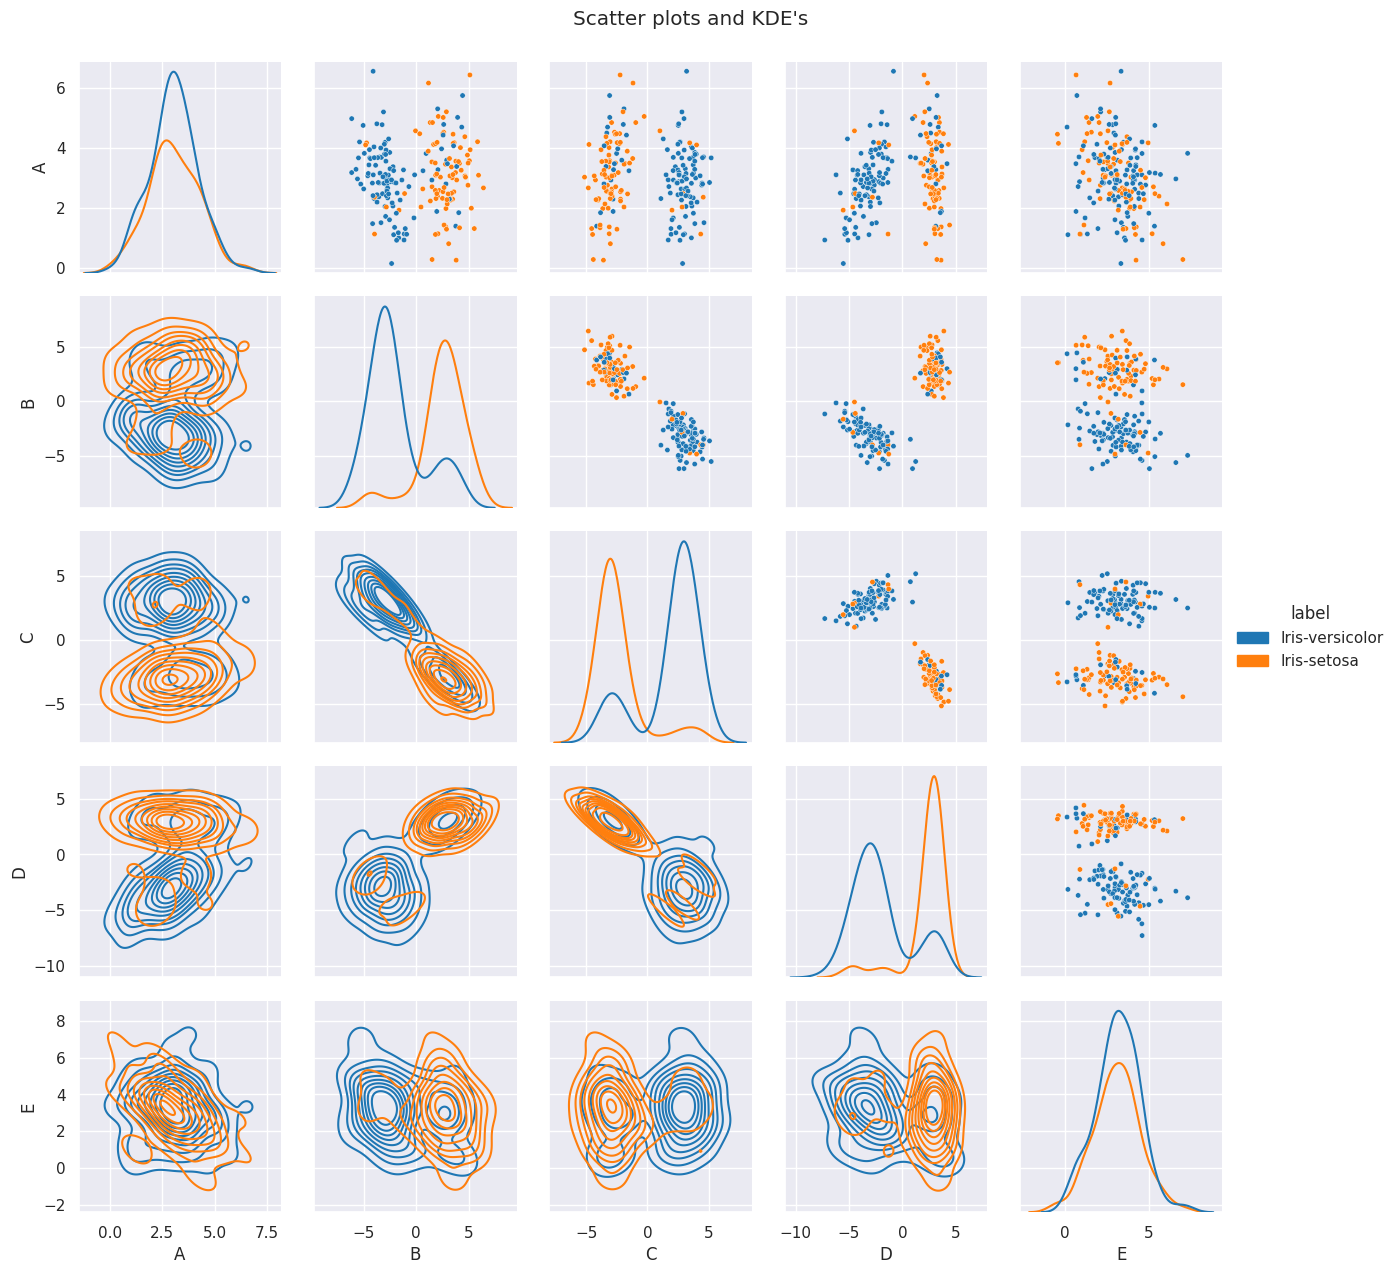

In [ ]:
pair_grid(dataset=var2_data, target='label')

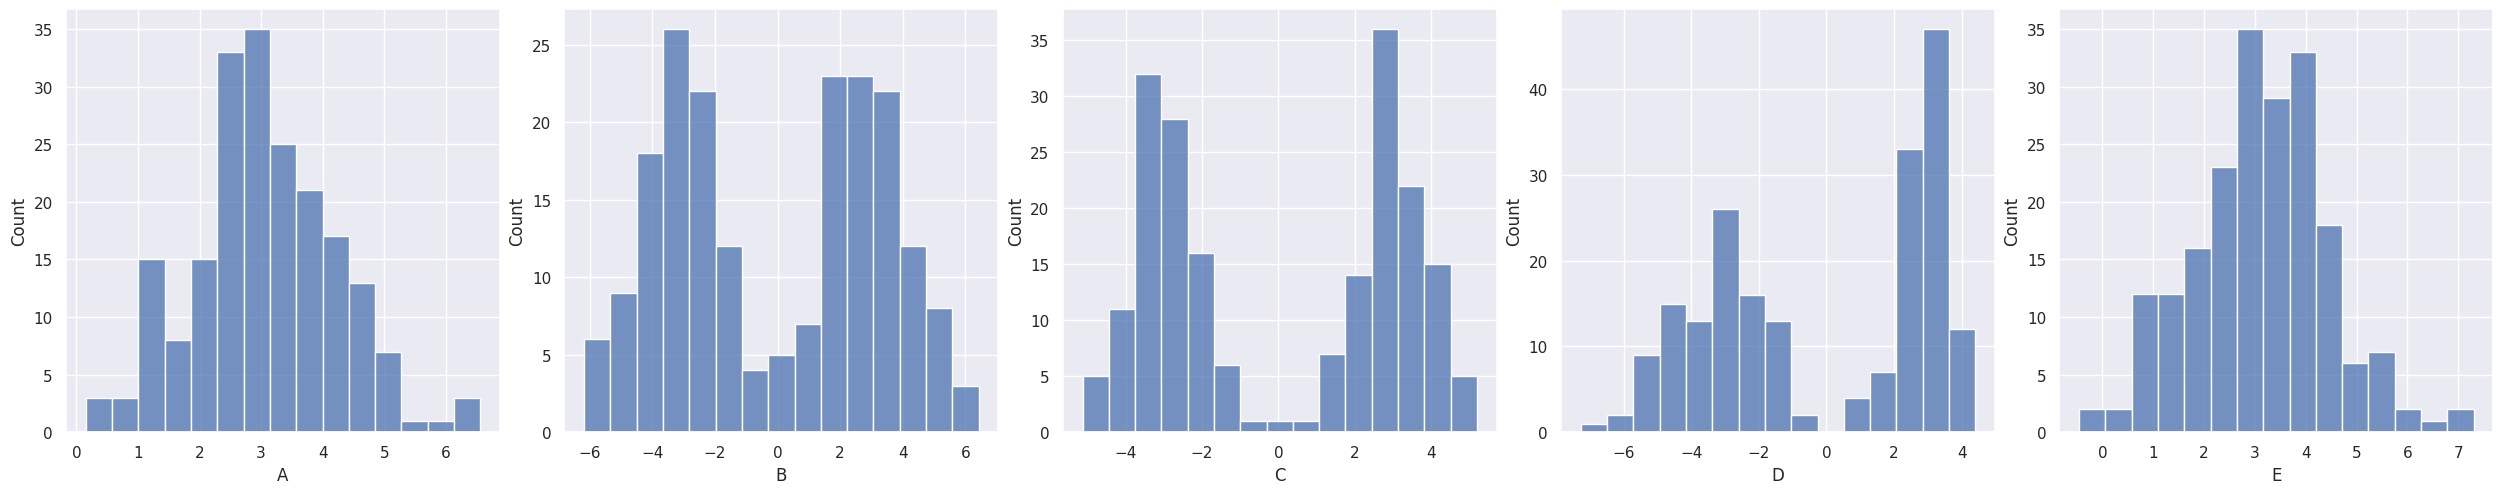

In [ ]:
histograms_plot(dataset=var2_data, n_cols=len(var2_data.columns)-1, n_bins=15)

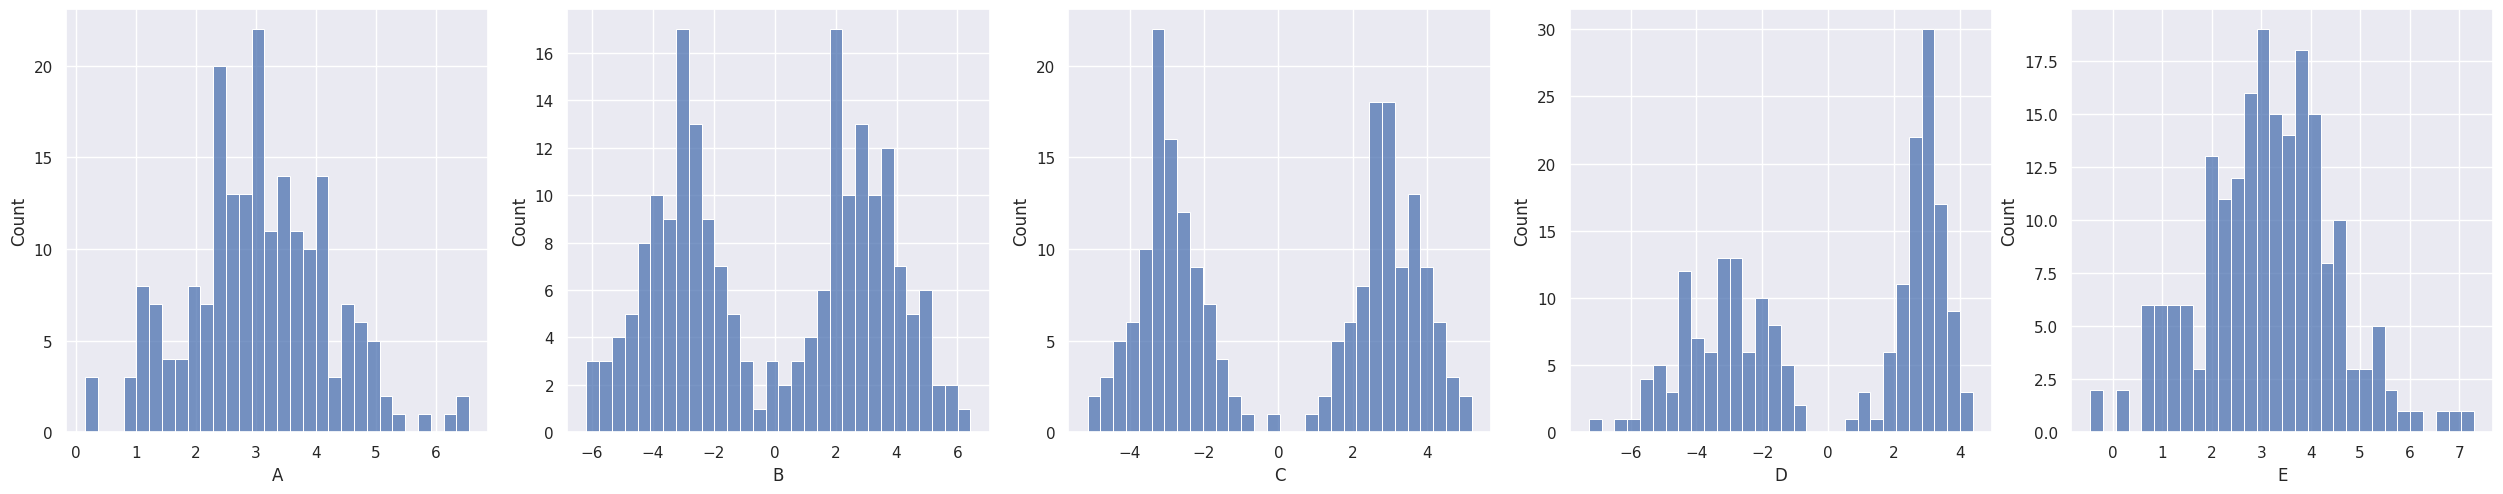

In [ ]:
histograms_plot(dataset=var2_data, n_bins=30, n_cols=len(var2_data.columns)-1)

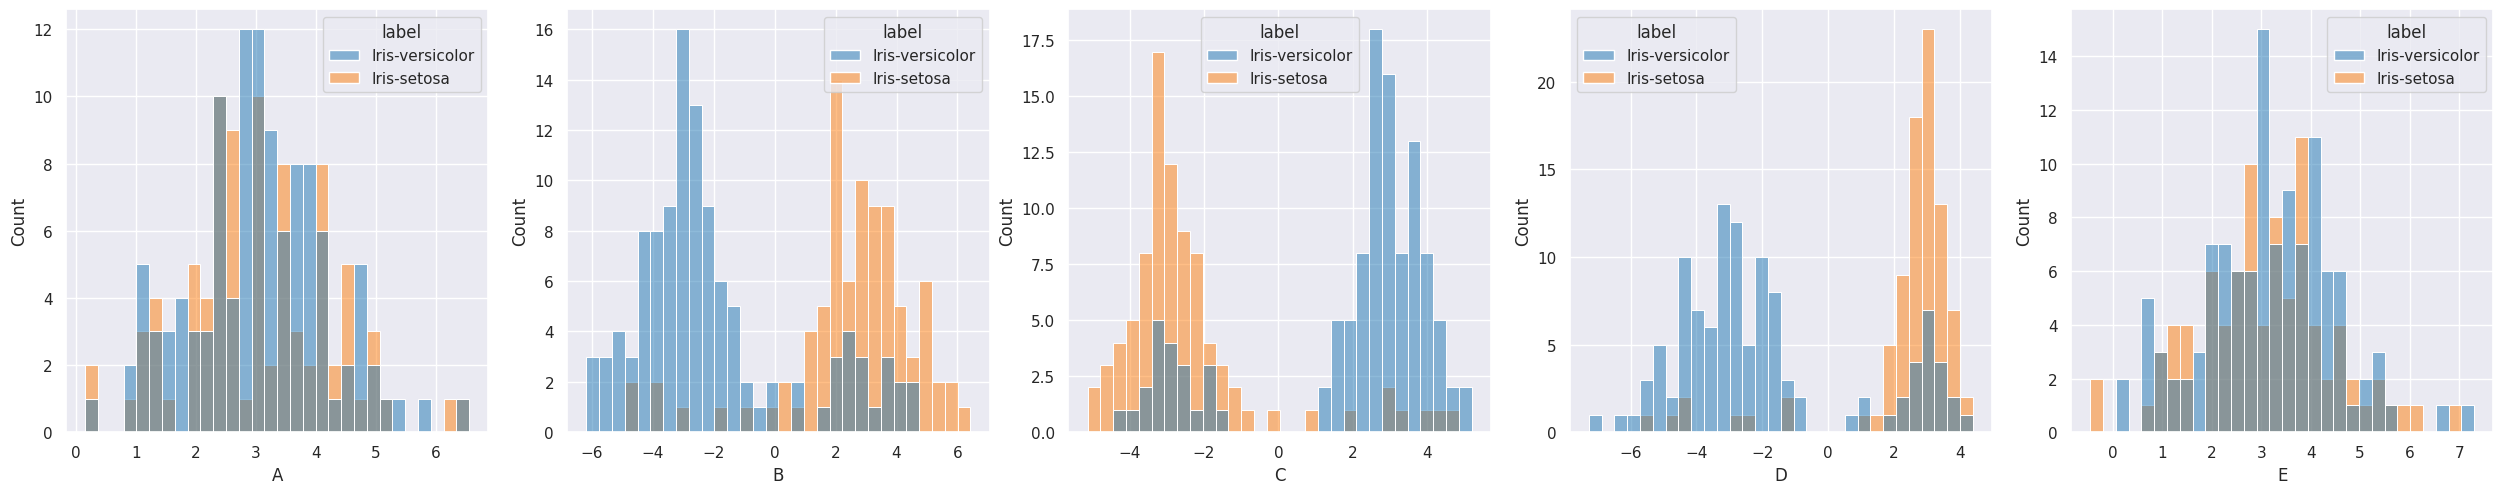

In [ ]:
histograms_plot(dataset=var2_data, n_bins=30, hue_val='label', n_cols=len(var2_data.columns)-1)

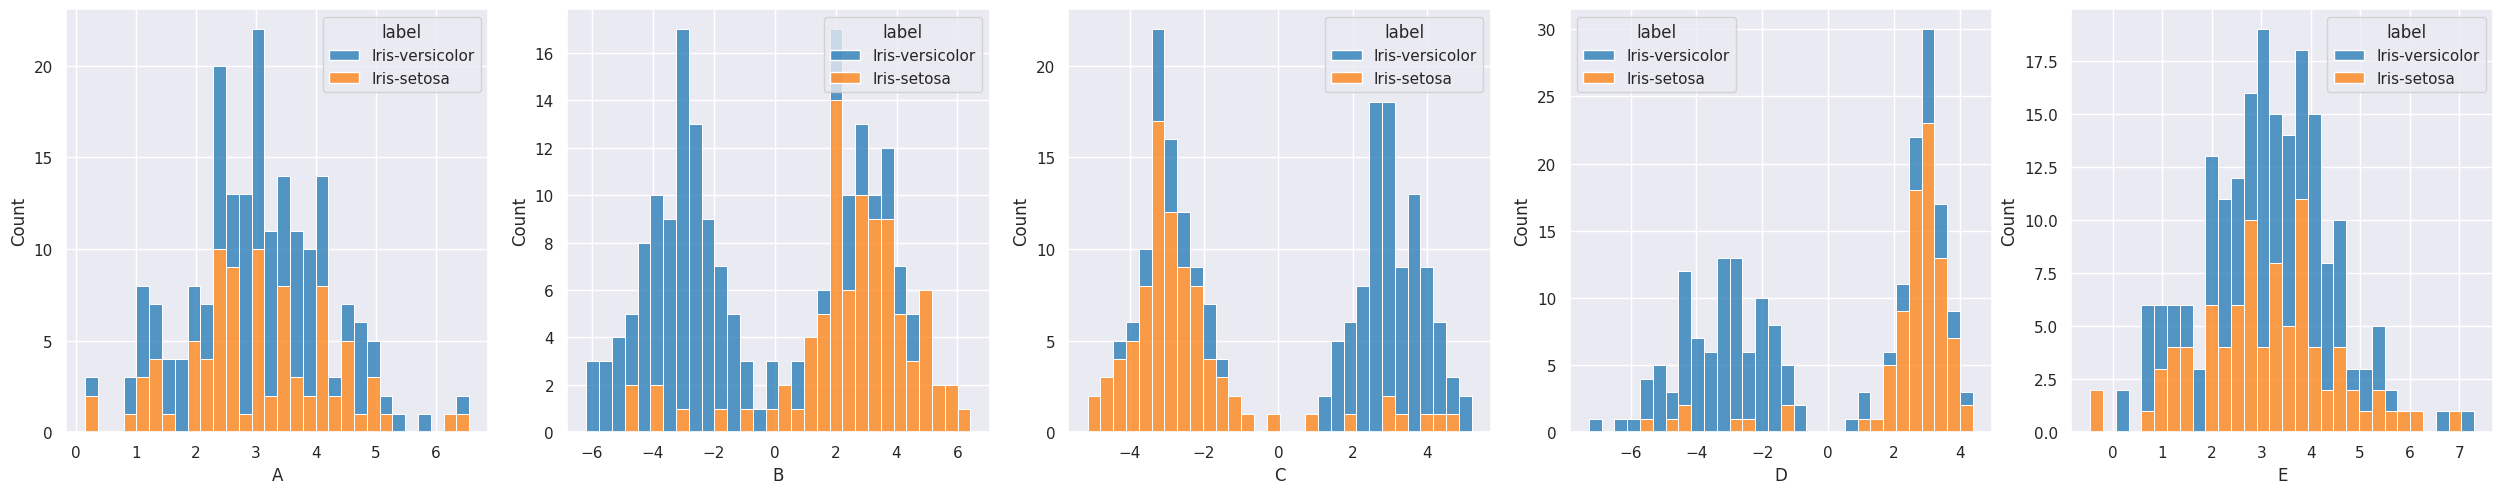

In [ ]:
histograms_plot(dataset=var2_data, n_bins=30,
                hue_val='label', multiple_mode='stack',
                n_cols=len(var2_data.columns)-1)

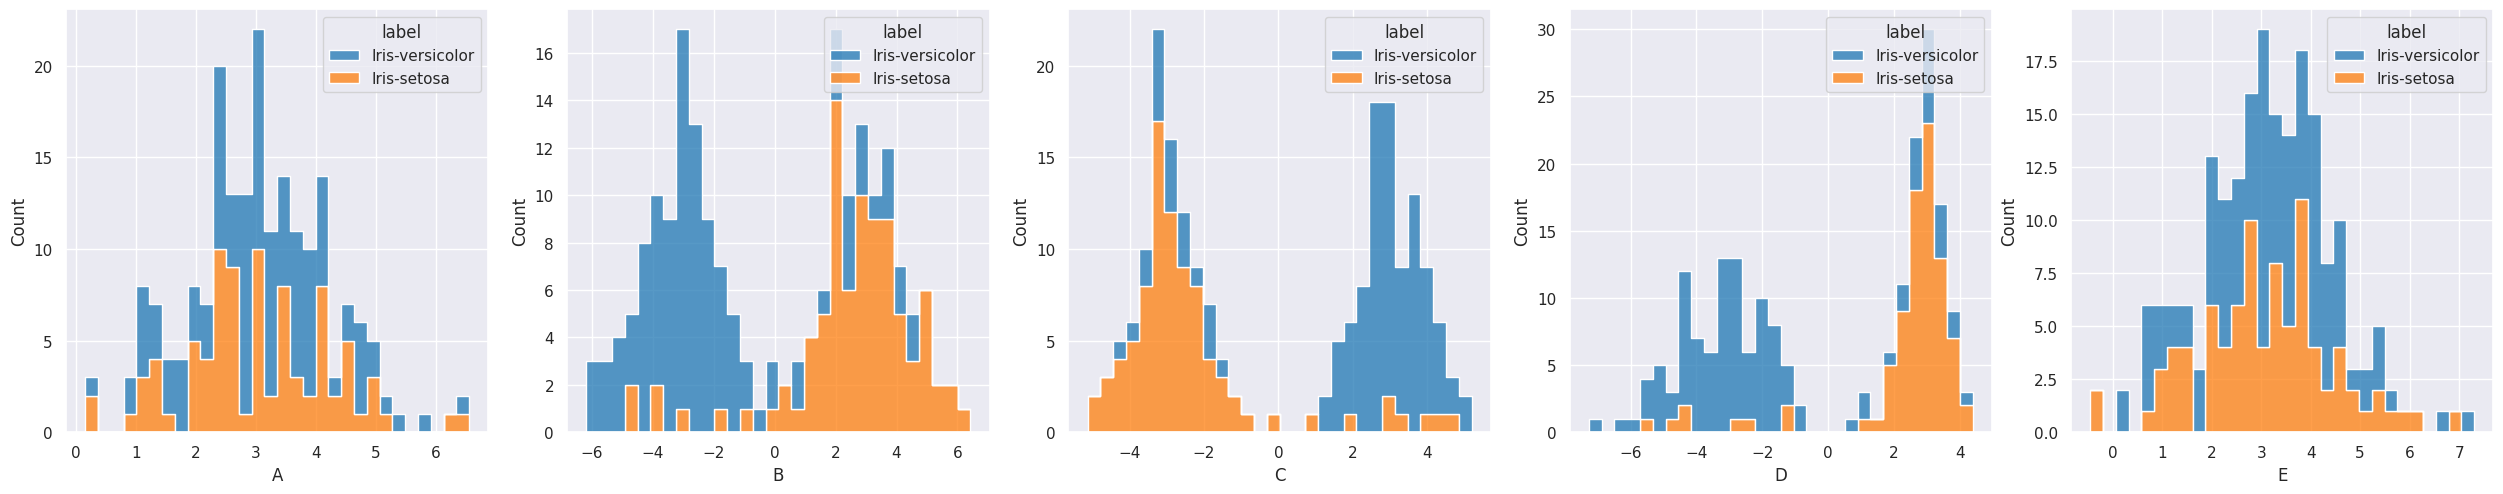

In [ ]:
histograms_plot(dataset=var2_data, n_bins=30,
                hue_val='label', multiple_mode='stack',
                element_val='step', n_cols=len(var2_data.columns)-1)

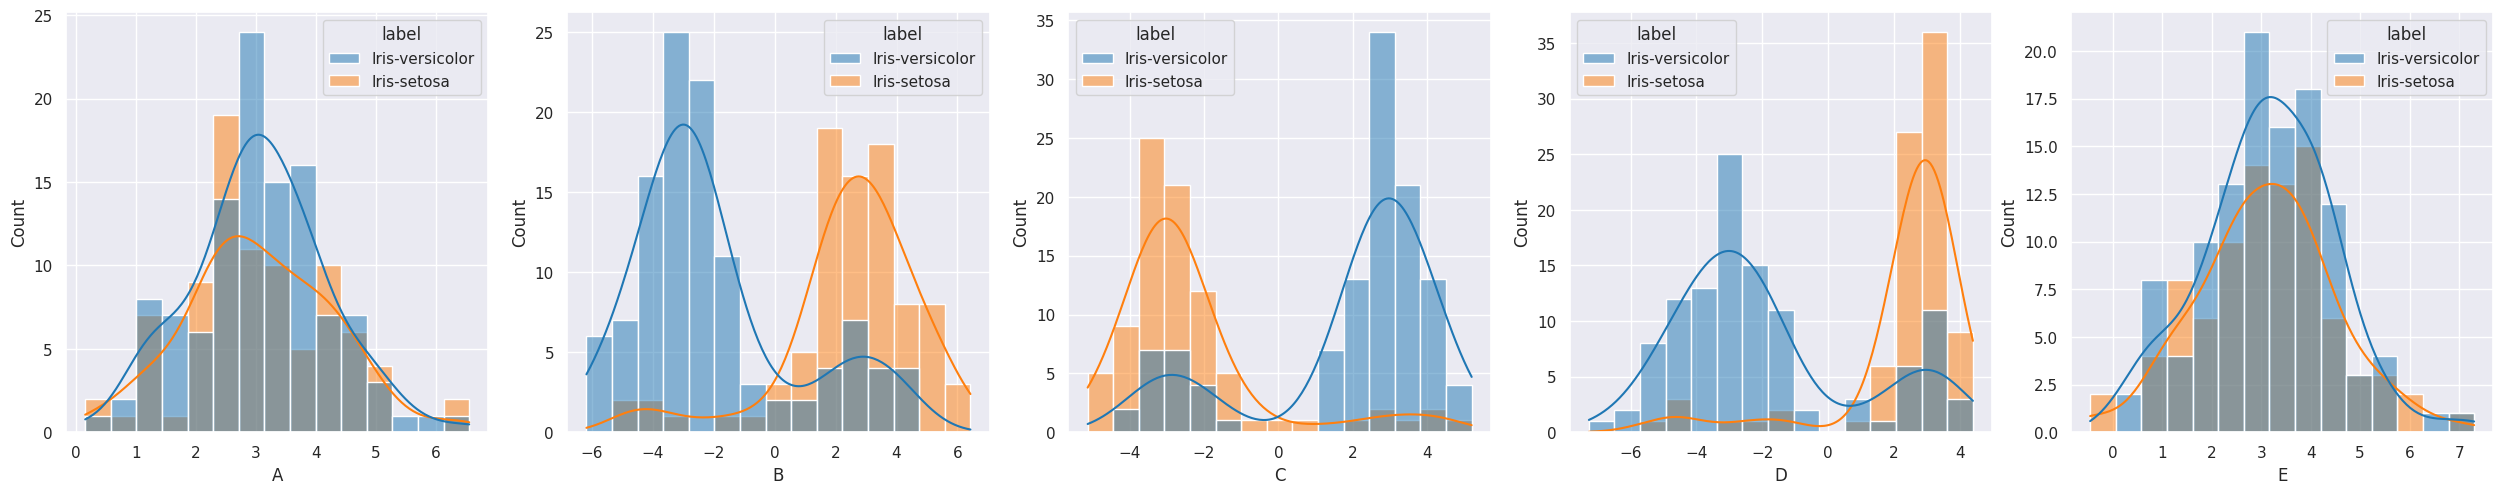

In [ ]:
histograms_plot(dataset=var2_data, hue_val='label',
                kde_val=True, n_cols=len(var2_data.columns)-1)

In [ ]:
iris_data.iloc[[0, 50, 100]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
label_encoder.fit_transform(iris_data['target'])[[0, 50, 100]]

array([0, 1, 2])

In [ ]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit_transform(iris_data[['target']]).toarray()[[0, 50, 100]]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
iris_data_np = iris_data.drop('target', axis=1).to_numpy()
iris_data_np[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

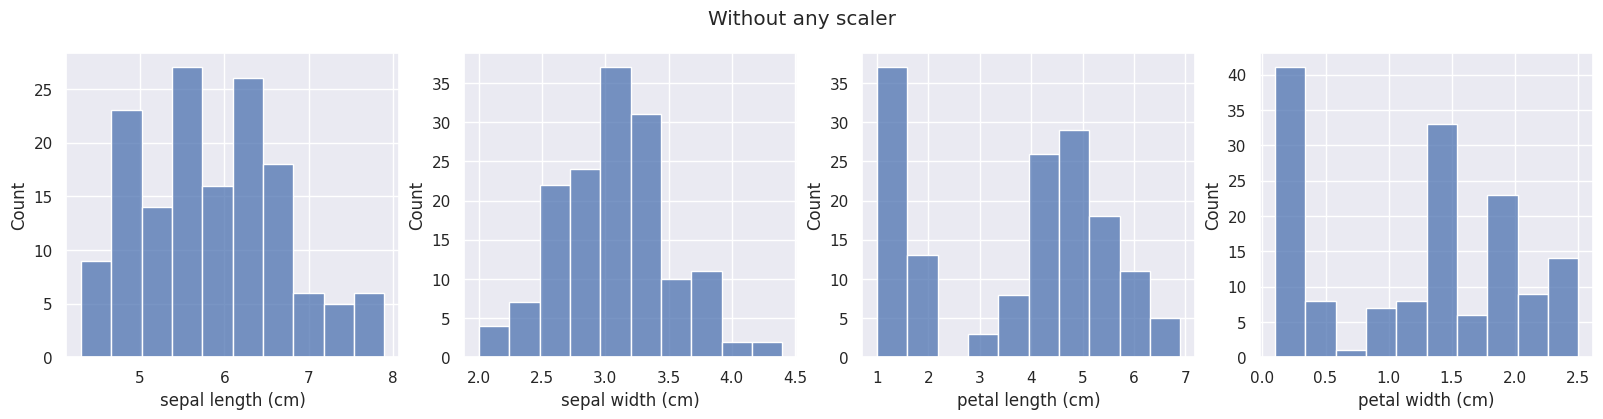

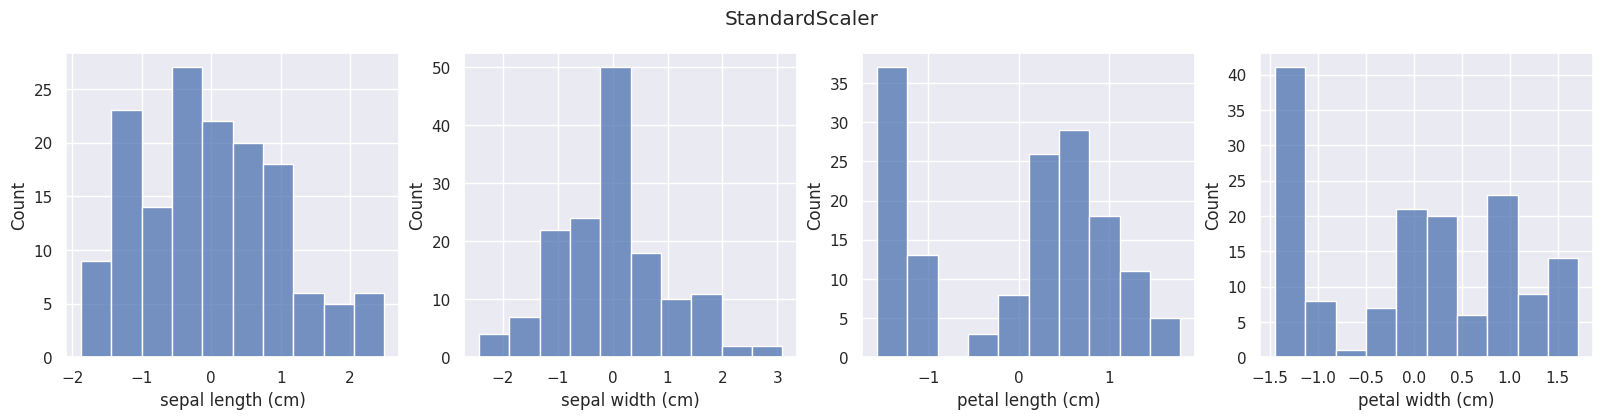

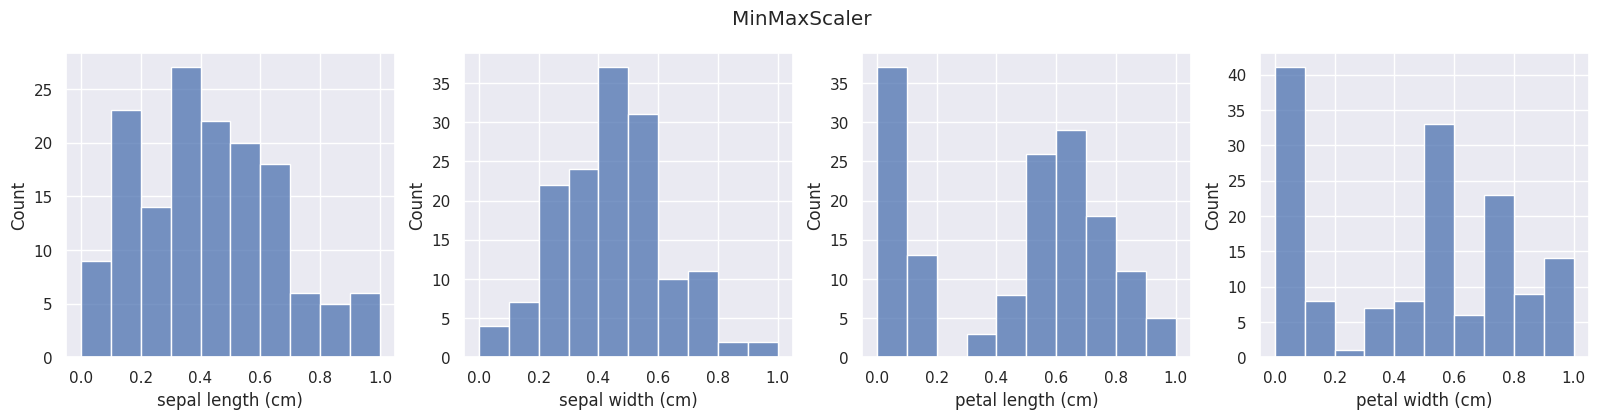

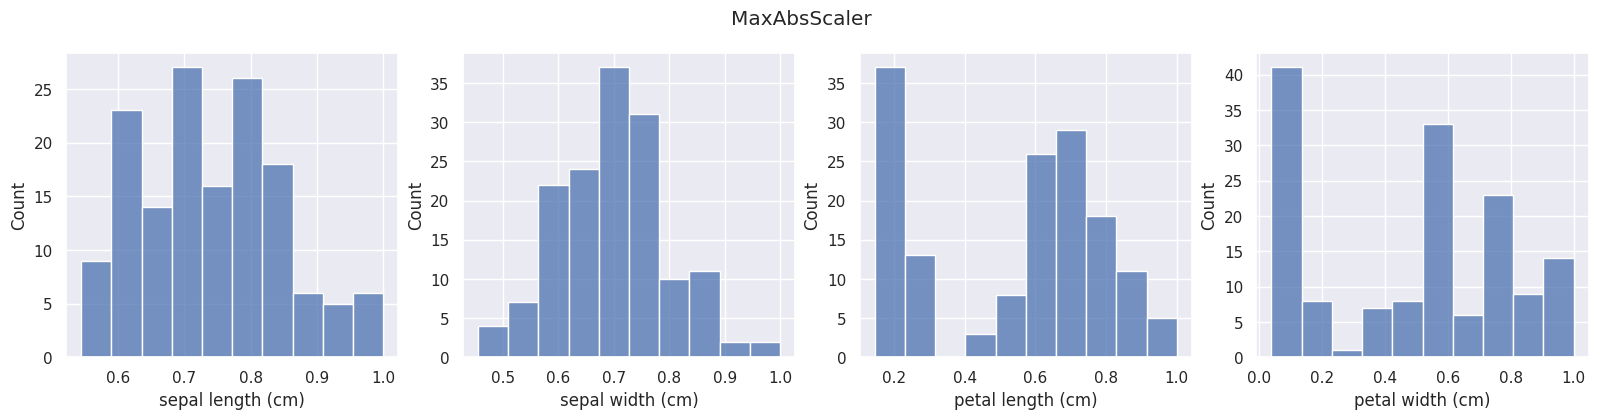

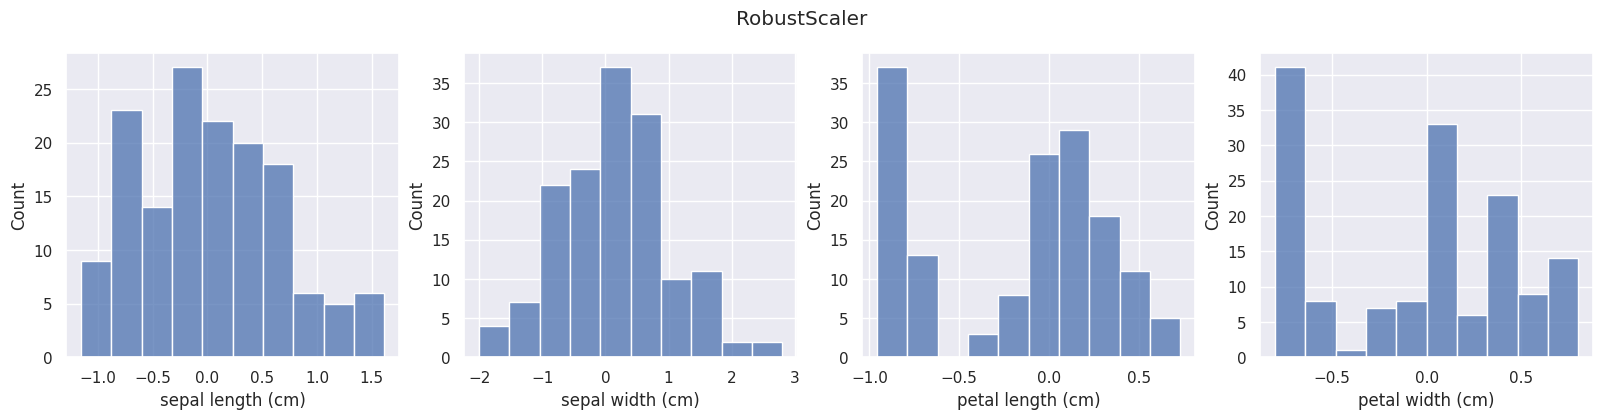

In [ ]:
from sklearn.preprocessing import StandardScaler, \
    MinMaxScaler, MaxAbsScaler, RobustScaler

preprocessors = [StandardScaler(), MinMaxScaler(),
                 MaxAbsScaler(), RobustScaler()]

histograms_plot(dataset=iris_data,
                n_cols=len(iris_data.columns)-1, n_bins=10,
                title_name='Without any scaler')

for preproc in preprocessors:
    iris_data_preproc = pd.DataFrame(preproc.fit_transform(iris_data_np).T,
                                      index=iris_data.columns[:-1]).T
    histograms_plot(dataset=iris_data_preproc, n_bins=10,
                n_cols=len(iris_data_preproc.columns), title_name=str(preproc)[:-2])

In [ ]:
list(iris_data.columns[:-1])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
mean = np.mean(iris_data_np, axis=0)
std = np.std(iris_data_np, axis=0)
vec = mean/std
matrix = np.array([vec for i in range(len(iris_data_np))])
iris_data_scaled_np = iris_data_np/std - matrix
np.abs(iris_data_scaled_np -
       StandardScaler().fit_transform(iris_data_np))[0:10]

array([[4.44089210e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16],
       [2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16],
       [2.22044605e-16, 3.88578059e-16, 2.22044605e-16, 2.22044605e-16],
       [0.00000000e+00, 1.38777878e-16, 0.00000000e+00, 2.22044605e-16],
       [0.00000000e+00, 8.88178420e-16, 2.22044605e-16, 2.22044605e-16],
       [1.11022302e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16],
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 0.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 2.77555756e-16, 2.22044605e-16, 2.22044605e-16],
       [2.22044605e-16, 1.38777878e-16, 0.00000000e+00, 2.22044605e-16]])

In [ ]:
mean = np.mean(iris_data_scaled_np, axis=0)
var = np.var(iris_data_scaled_np, axis=0)
min = np.min(iris_data_scaled_np, axis=0)
max = np.max(iris_data_scaled_np, axis=0)
print(f"mean = {mean}")
print(f"var = {var}")
print(f"min = {min}")
print(f"max = {max}")

mean = [-6.57252031e-16 -6.92779167e-16 -9.62193288e-16 -2.75335310e-16]
var = [1. 1. 1. 1.]
min = [-1.87002413 -2.43394714 -1.56757623 -1.44707648]
max = [2.4920192  3.09077525 1.78583195 1.71209594]


In [ ]:
iris_data['target'].replace([0, 1, 2],
 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], inplace=True)

new_iris_data = iris_data[iris_data['target'].isin(['Iris-versicolor',
                                                    'Iris-virginica'])]
low_lim = np.quantile(new_iris_data.to_numpy()[:, 1], q=0.25)
high_lim = np.quantile(new_iris_data.to_numpy()[:, 1], q=0.75)
new_iris_data = new_iris_data[(new_iris_data['sepal width (cm)'] > low_lim) &
                              (new_iris_data['sepal width (cm)'] < high_lim)]

new_iris_data.drop(columns=['sepal width (cm)', 'petal width (cm)'],
                   inplace=True)
new_iris_data.head()

,sepal length (cm),petal length (cm),target
54,6.5,4.6,Iris-versicolor
55,5.7,4.5,Iris-versicolor
58,6.6,4.6,Iris-versicolor
61,5.9,4.2,Iris-versicolor
63,6.1,4.7,Iris-versicolor


In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


[Text(0.5, 1.0, 't-SNE')]

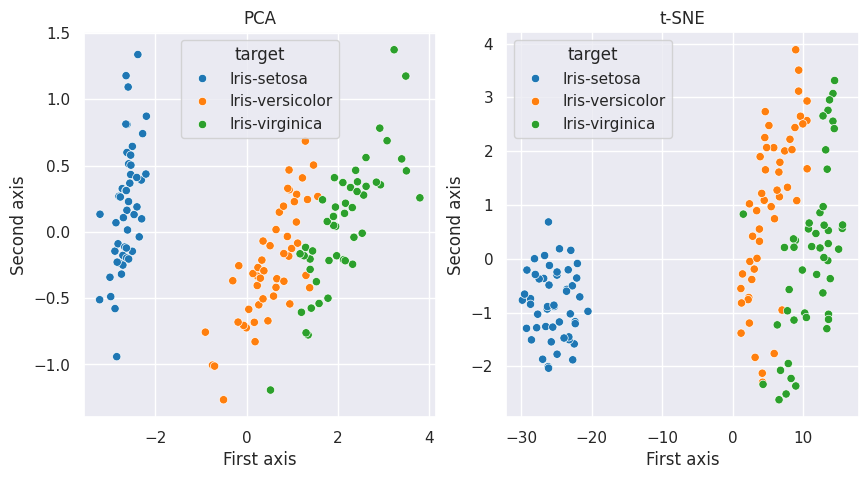

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
iris_data_pca_np = pca.fit_transform(iris_data_scaled_np)

tsne = TSNE()
iris_data_tsne_np = tsne.fit_transform(iris_data_scaled_np)

iris_data_pca = pd.DataFrame(data=iris_data_pca_np,
                             columns=['First axis', 'Second axis'])

iris_data_pca = iris_data_pca.join(iris_data['target'])

iris_data_tsne = pd.DataFrame(data=iris_data_tsne_np,
                              columns=['First axis', 'Second axis'])

iris_data_tsne = iris_data_tsne.join(iris_data['target'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=iris_data_pca, hue='target',
                ax=axes[0], palette='tab10',
                x=iris_data_pca.columns[0],
                y=iris_data_pca.columns[1]).set(title='PCA')

sns.scatterplot(data=iris_data_tsne, hue='target',
                ax=axes[1], palette='tab10',
                x=iris_data_tsne.columns[0],
                y=iris_data_tsne.columns[1]).set(title='t-SNE')
